In [1]:
model_type = "model_log_reg"

In [2]:
import sys
sys.path.append(rf'Classification\titanic\{model_type}')

In [3]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt
import dalex
from sklearn.inspection import PartialDependenceDisplay
import shap

In [4]:
yaml_path = rf"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\{model_type}\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

# Params

In [5]:
X_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_val'])   
    
y_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_val'])


X_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_train'])   
    
y_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_train'])
    
params_ = {
        'X_train_feat_sel': X_train_feat_sel,
        'y_train_feat_sel': y_train_feat_sel,
        'X_val_feat_sel': X_val_feat_sel,
        'y_val_feat_sel': y_val_feat_sel,
        'model': config['model']['path'],
        'save_plot': config['save_reports']['path_plot'],
        'removed_cols': config['save_reports']['path_reports'],
        }

# Read Train / val dataset

In [6]:
X_train = pd.read_parquet(params_['X_train_feat_sel'])
y_train = pd.read_parquet(params_['y_train_feat_sel'])   

X_val = pd.read_parquet(params_['X_val_feat_sel'])
y_val = pd.read_parquet(params_['y_val_feat_sel'])    

In [7]:
model_path = os.path.join(
        config['init_path'],
        params_['model'],
        f"model_{config['model']['model_version']}.pkl")    
with open(model_path, "rb") as file:
            model = pickle.load(file)

# Drop columns

In [8]:
X_train.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)

X_val.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)


# Partial dependence plot

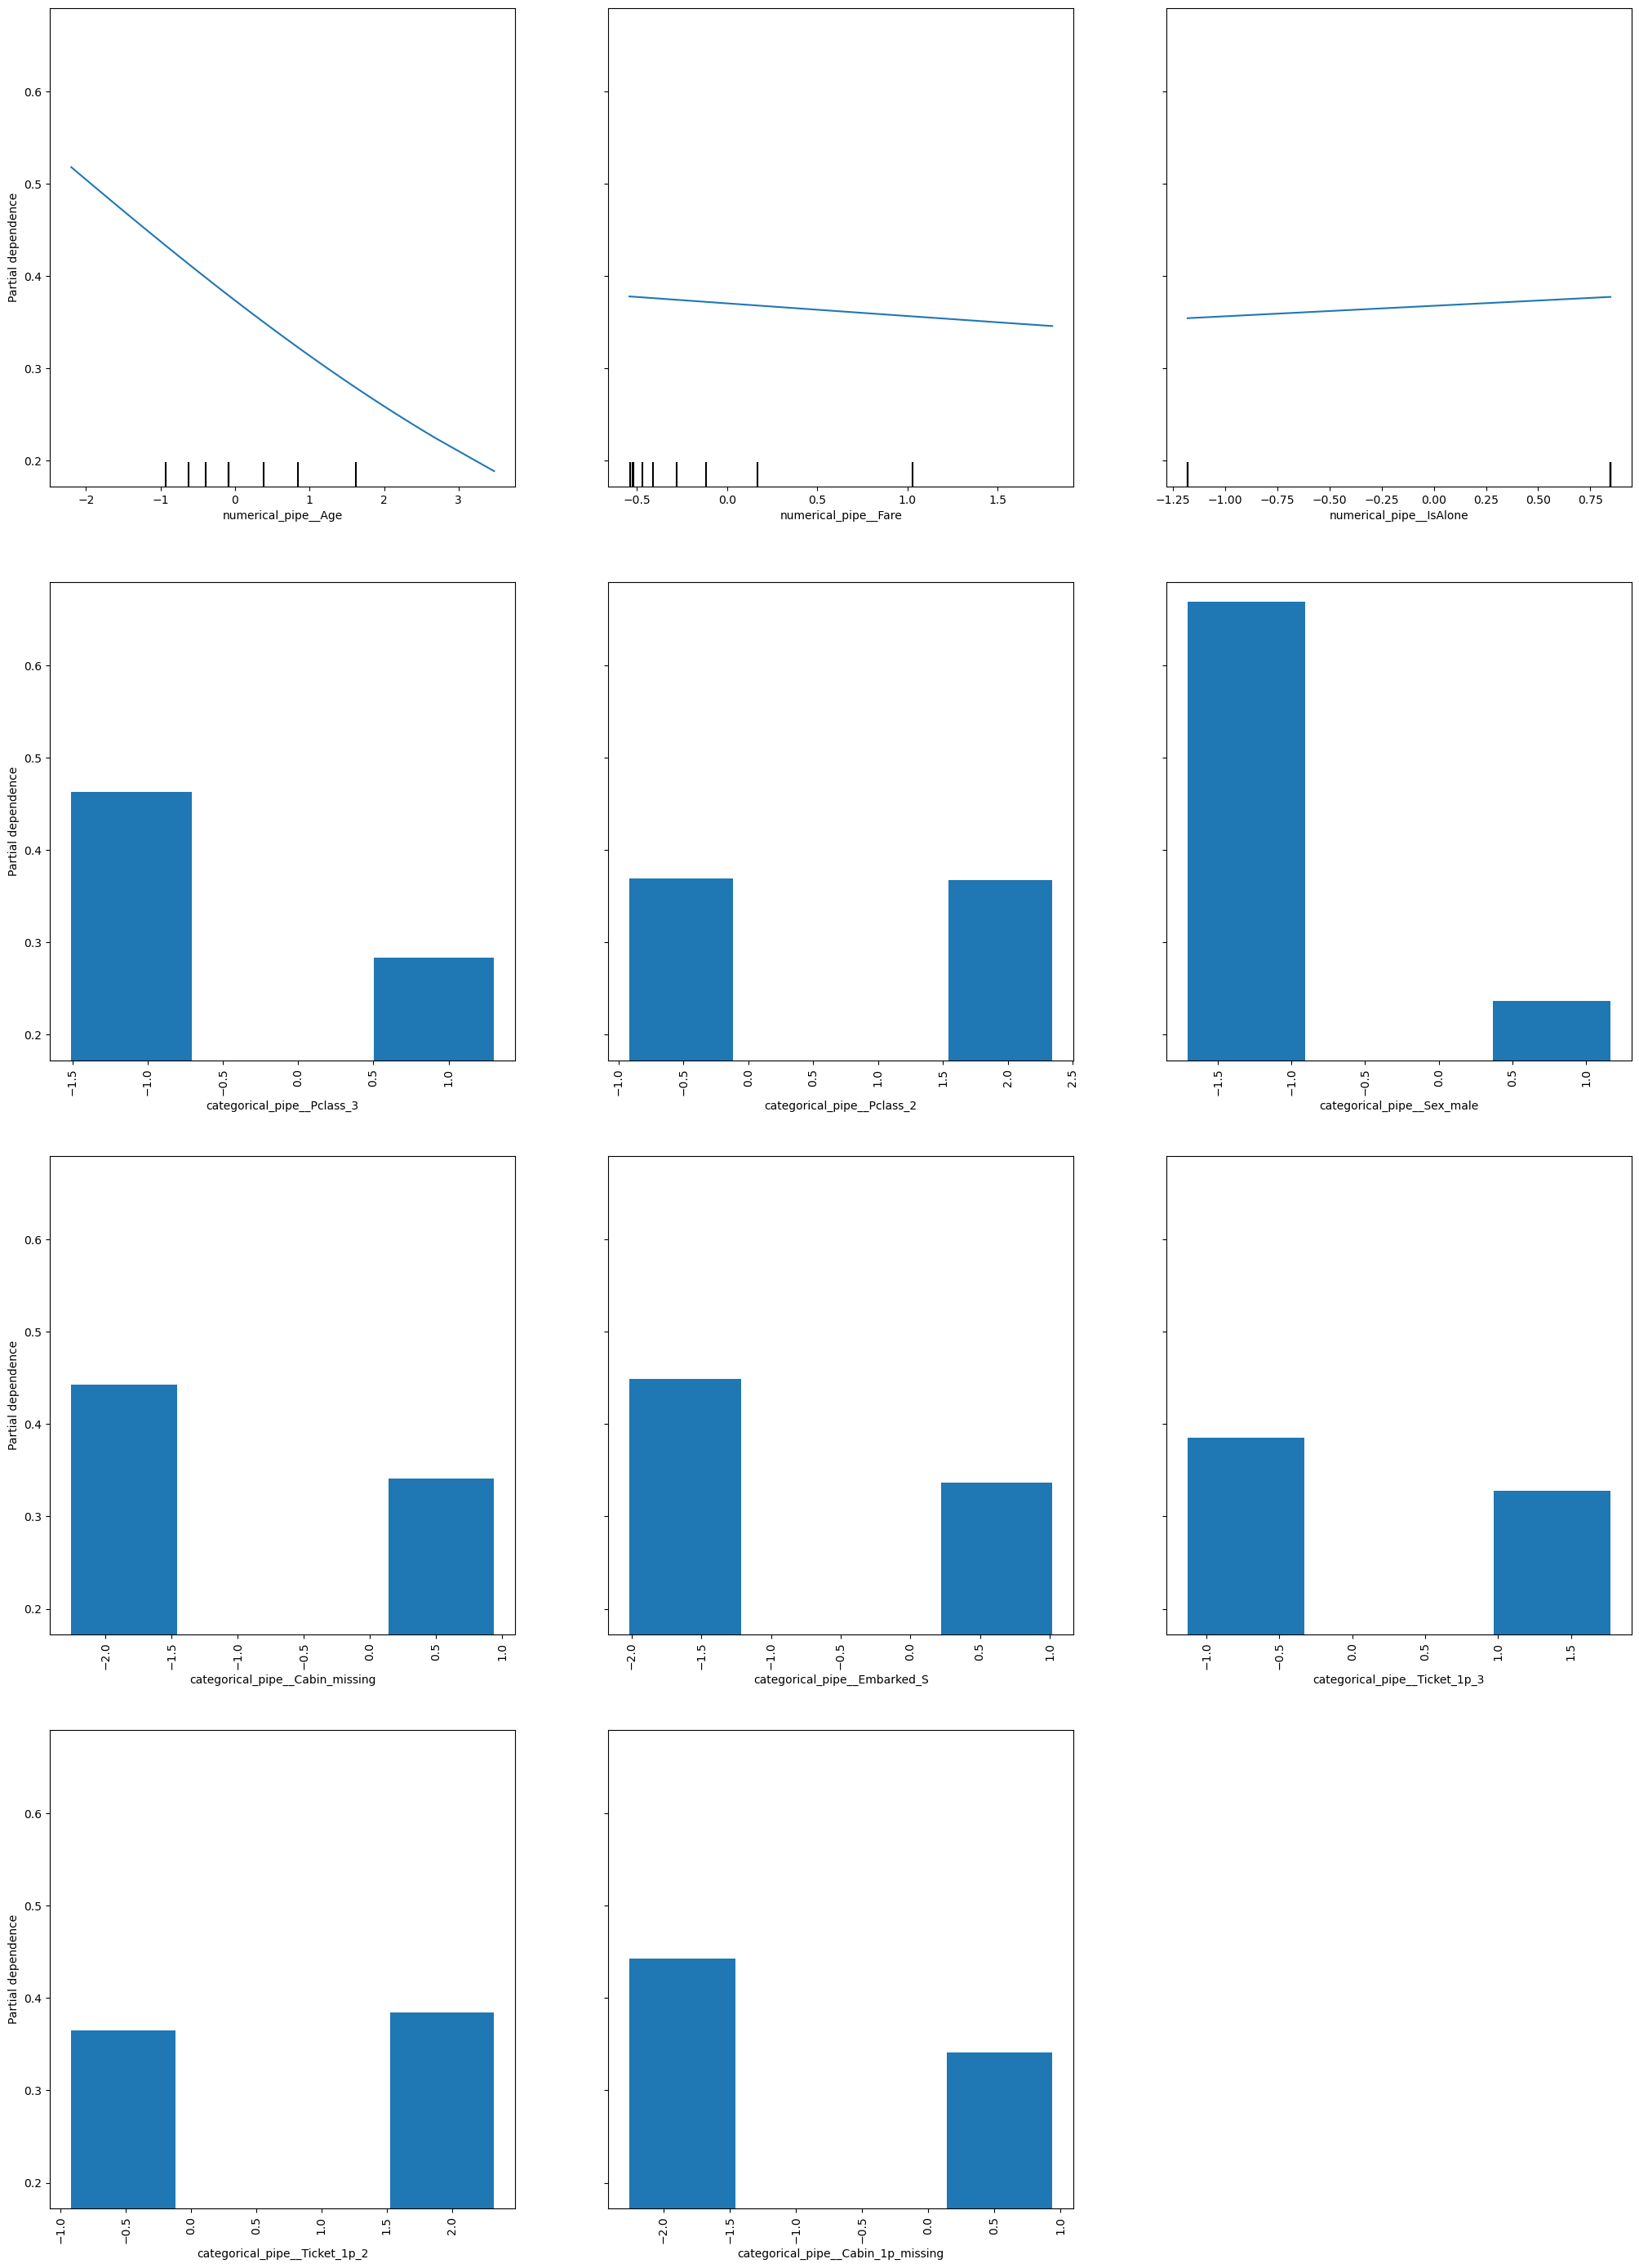

In [9]:
fig, ax = plt.subplots(figsize=(25, 35))
PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_val,
        features = X_val.columns.tolist(),
        categorical_features=X_val.columns[X_val.columns.str.contains('categorical_pipe')],
        random_state=23,
        ax=ax

    )

# Shap Values

In [15]:
X_val_proba = model.predict_proba(X_val)

In [10]:
explainer = shap.Explainer(model.predict_proba, X_train)

In [21]:
shap_values_train = explainer(X_train)
shap_values_val = explainer(X_val)

PermutationExplainer explainer: 669it [00:25, 15.79it/s]                         


C:\Users\gustavo\AppData\Local\Temp\ipykernel_24688\1998943348.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


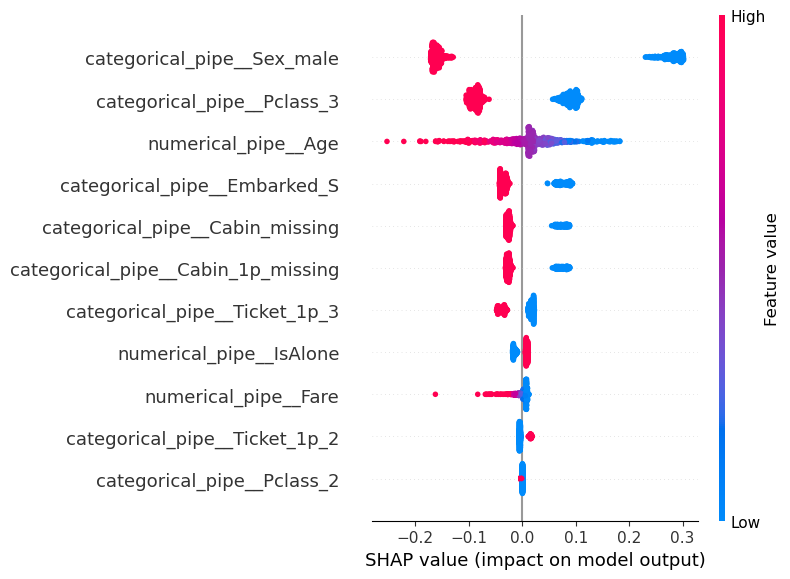

In [22]:
# Classe positiva (geralmente índice 1)
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train
)

C:\Users\gustavo\AppData\Local\Temp\ipykernel_24688\919611994.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


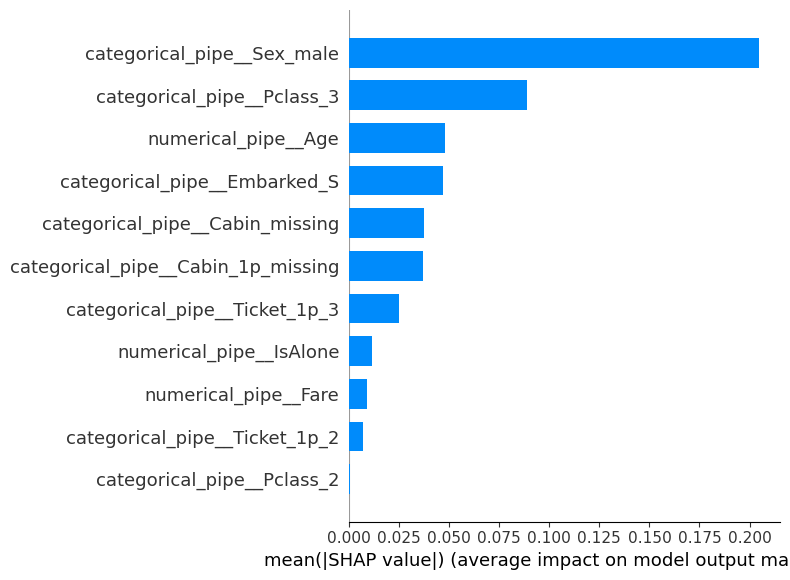

In [23]:
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train,
    plot_type="bar"
)


In [17]:
X_val_proba[:,1]

array([0.62219691, 0.07004609, 0.12047472, 0.69307747, 0.35017441,
       0.12511493, 0.12795843, 0.13050045, 0.49457782, 0.06107191,
       0.2877222 , 0.10774858, 0.82157354, 0.14460068, 0.2964904 ,
       0.62219114, 0.07709464, 0.63747546, 0.54061199, 0.69790229,
       0.64699673, 0.13167698, 0.41471288, 0.52524011, 0.2215968 ,
       0.0769876 , 0.39758586, 0.1378907 , 0.0770731 , 0.07617709,
       0.0670539 , 0.10261668, 0.21688648, 0.09730429, 0.28320738,
       0.0771849 , 0.12722083, 0.86029488, 0.90125394, 0.23451752,
       0.40220024, 0.0647046 , 0.49605754, 0.1443489 , 0.40272144,
       0.04270239, 0.26997655, 0.07709464, 0.92663185, 0.07711152,
       0.6145219 , 0.57886747, 0.10491055, 0.44910416, 0.0915744 ,
       0.75904756, 0.1307643 , 0.74424018, 0.08752423, 0.22376472,
       0.23101275, 0.56143327, 0.06264343, 0.12880189, 0.10173075,
       0.47221081, 0.78700022, 0.87316182, 0.40641073, 0.48482824,
       0.32835866, 0.14164773, 0.14915839, 0.55690936, 0.69926

In [13]:
X_val.loc[727]

numerical_pipe__Age                  -0.082329
numerical_pipe__Fare                 -0.524185
numerical_pipe__IsAlone               0.846891
categorical_pipe__Pclass_3            0.902894
categorical_pipe__Pclass_2           -0.514929
categorical_pipe__Sex_male           -1.305547
categorical_pipe__Cabin_missing       0.538122
categorical_pipe__Embarked_S         -1.615800
categorical_pipe__Ticket_1p_3         1.370879
categorical_pipe__Ticket_1p_2        -0.519579
categorical_pipe__Cabin_1p_missing    0.538122
Name: 727, dtype: float64

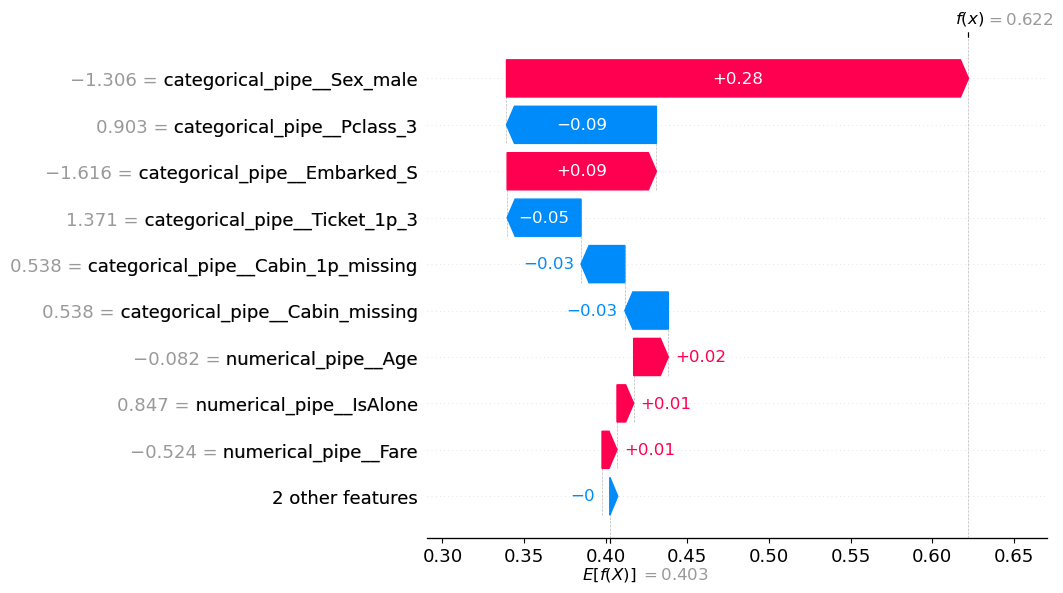

In [14]:
shap.plots.waterfall(shap_values[0,:,1])

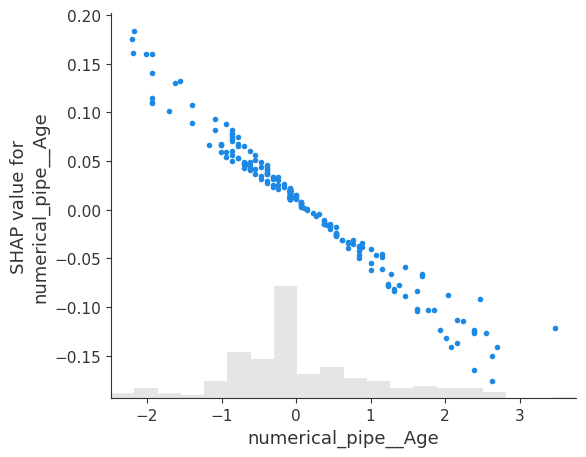

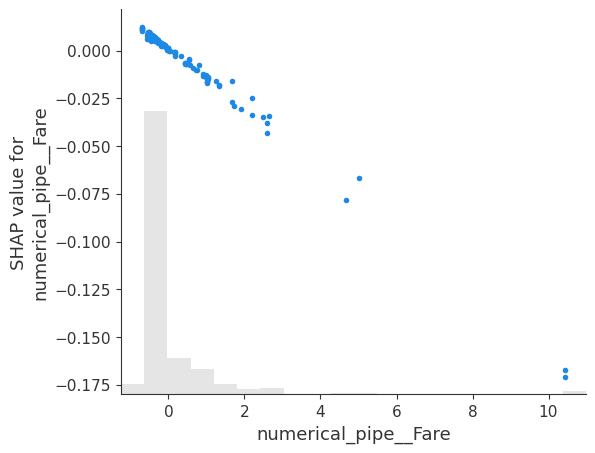

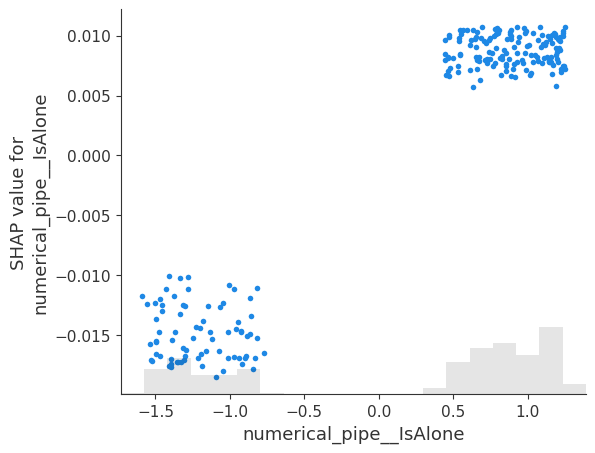

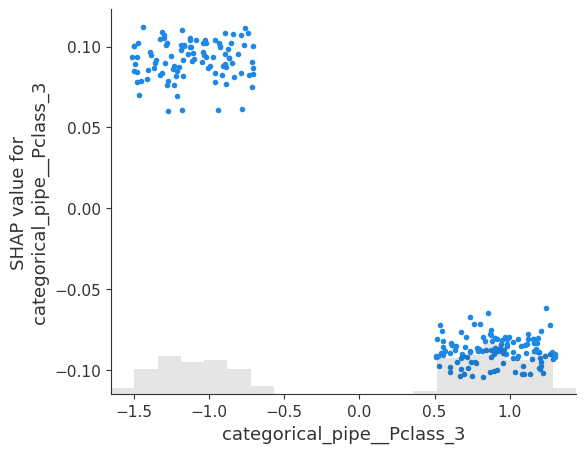

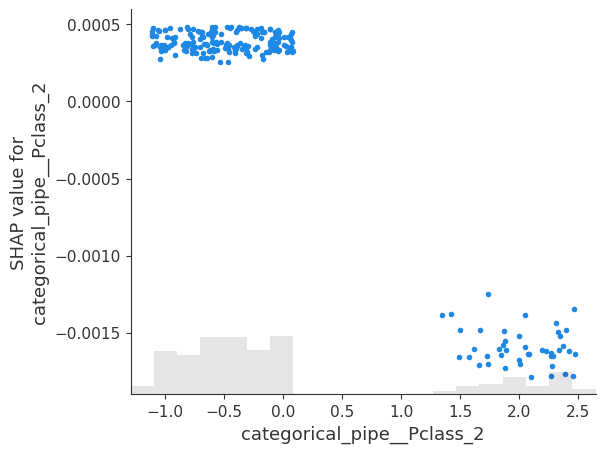

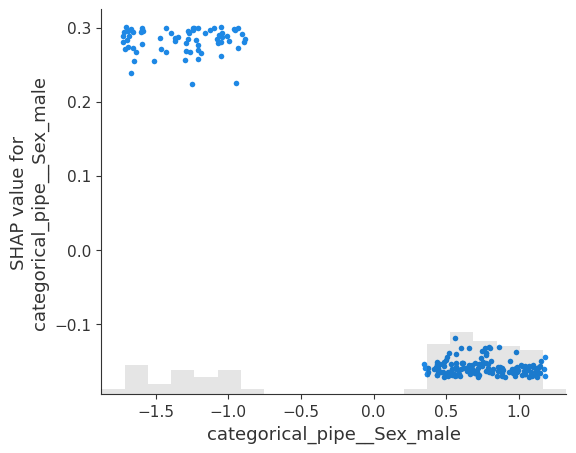

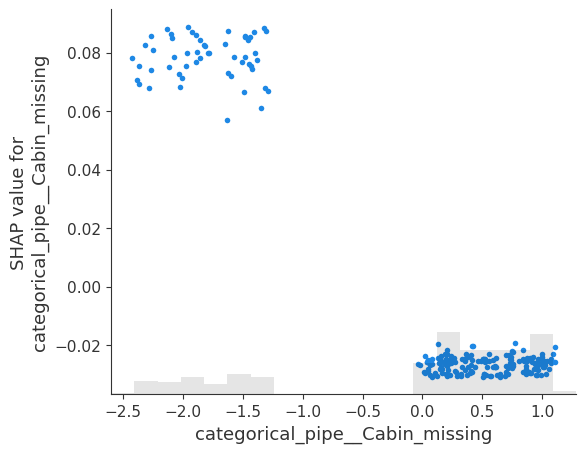

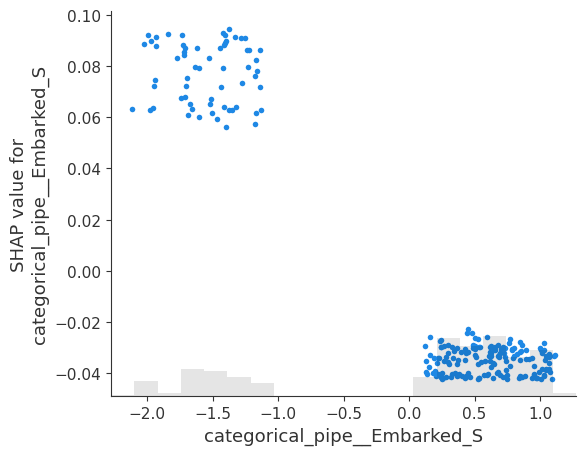

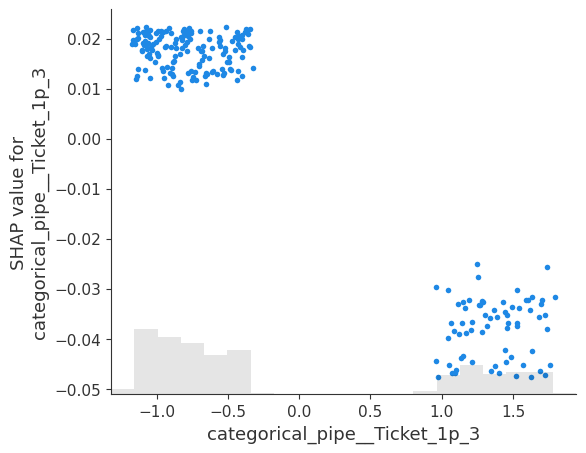

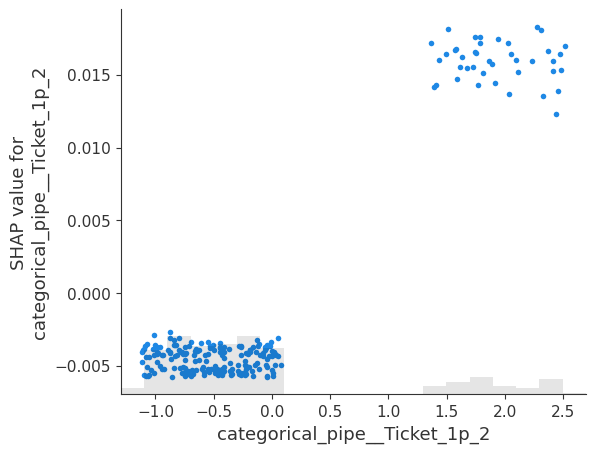

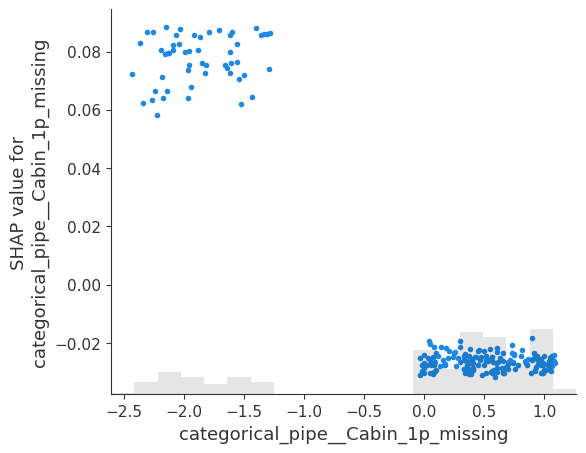

In [20]:
for col in X_val.columns:
    shap.plots.scatter(shap_values[:,col,1])